In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import requests
import numpy as np

url = 'https://github.com/Giofabro/exercise-data-analysis/raw/main/Data_Repository/googleplaystore.csv'
response = requests.get(url)
open('googleplaystore.csv', 'wb').write(response.content)

url = 'https://github.com/Giofabro/exercise-data-analysis/raw/main/Data_Repository/googleplaystore_user_reviews.csv'
response = requests.get(url)
open('googleplaystore_user_reviews.csv', 'wb').write(response.content)

# load in the data
playstore = pd.read_csv("googleplaystore.csv")
user_reviews = pd.read_csv("googleplaystore_user_reviews.csv")


# line
line = "____________________"

# Dataframe Cleaning

Let's examine our dataframes. Let's see how many null fields there are and update our dataframes. 

In [2]:
print(playstore.isnull().sum())
print(line)
print(user_reviews.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
____________________
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [3]:
# Scartare valore null
playstore = playstore.dropna()
user_reviews = user_reviews.dropna()

# Scartare duplicati
playstore = playstore.drop_duplicates()
user_reviews = user_reviews.drop_duplicates()

# Cambio tipologia dato per la colonna "Reviews" 
playstore['Reviews'] = playstore['Reviews'].astype(float)

# Cambio tipologia dato per la colonna "Price"
playstore['Price'] = playstore['Price'].str.replace('$', '', regex=True).astype(float)

# Cambio tipologia dato e Rimozione dei caratteri non numerici dalla colonna "Installs"
playstore['Installs'] = playstore['Installs'].astype(str).replace('[^\d\.]', '', regex=True).astype(float)

# Funzione cambio tipologia dato e modifica caratteri per la colonna "Size"
def convert_size(size):
    if 'M' in size:
        size = float(size.replace('M', '')) * 1000000
    elif 'k' in size:
        size = float(size.replace('k', '')) * 1000
    else:
        size = np.nan
    return size

playstore['Size'] = playstore['Size'].apply(convert_size)

In [4]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### How many categories are there?

To move best in our analysis, first we need to be aware of how many categories are available in our Dataframe. We understand what is the largest category present in our Dataframe, especially in terms of percentages. 

In [5]:
category_props = playstore.Category.value_counts() / len(playstore.Category) * 100
print(round(category_props, 2))

FAMILY                 19.32
GAME                   12.09
TOOLS                   8.25
PRODUCTIVITY            3.76
FINANCE                 3.57
PERSONALIZATION         3.47
COMMUNICATION           3.45
LIFESTYLE               3.43
PHOTOGRAPHY             3.42
MEDICAL                 3.40
SPORTS                  3.22
BUSINESS                3.04
HEALTH_AND_FITNESS      2.95
SOCIAL                  2.75
NEWS_AND_MAGAZINES      2.41
TRAVEL_AND_LOCAL        2.31
SHOPPING                2.27
BOOKS_AND_REFERENCE     1.99
VIDEO_PLAYERS           1.80
DATING                  1.79
EDUCATION               1.45
MAPS_AND_NAVIGATION     1.40
ENTERTAINMENT           1.25
FOOD_AND_DRINK          1.19
WEATHER                 0.84
AUTO_AND_VEHICLES       0.82
HOUSE_AND_HOME          0.77
LIBRARIES_AND_DEMO      0.72
ART_AND_DESIGN          0.69
COMICS                  0.65
PARENTING               0.56
EVENTS                  0.51
BEAUTY                  0.47
Name: Category, dtype: float64


Nearly 20 percent for the Family category. This is followed by Game with 12 percent. From the tools category onward the categories do not exceed 10 percent. However, we are talking about as many as 33 total categories, each with its own niche. The app we need to develop must certainly have its own identity and an easily associated category. Certainly knowing that 20% of the apps in the playstore belong to the Family category gives us an interesting insight: content that is accessible and available for all ages. 

Let's take a closer look at our categories in numerical terms. 

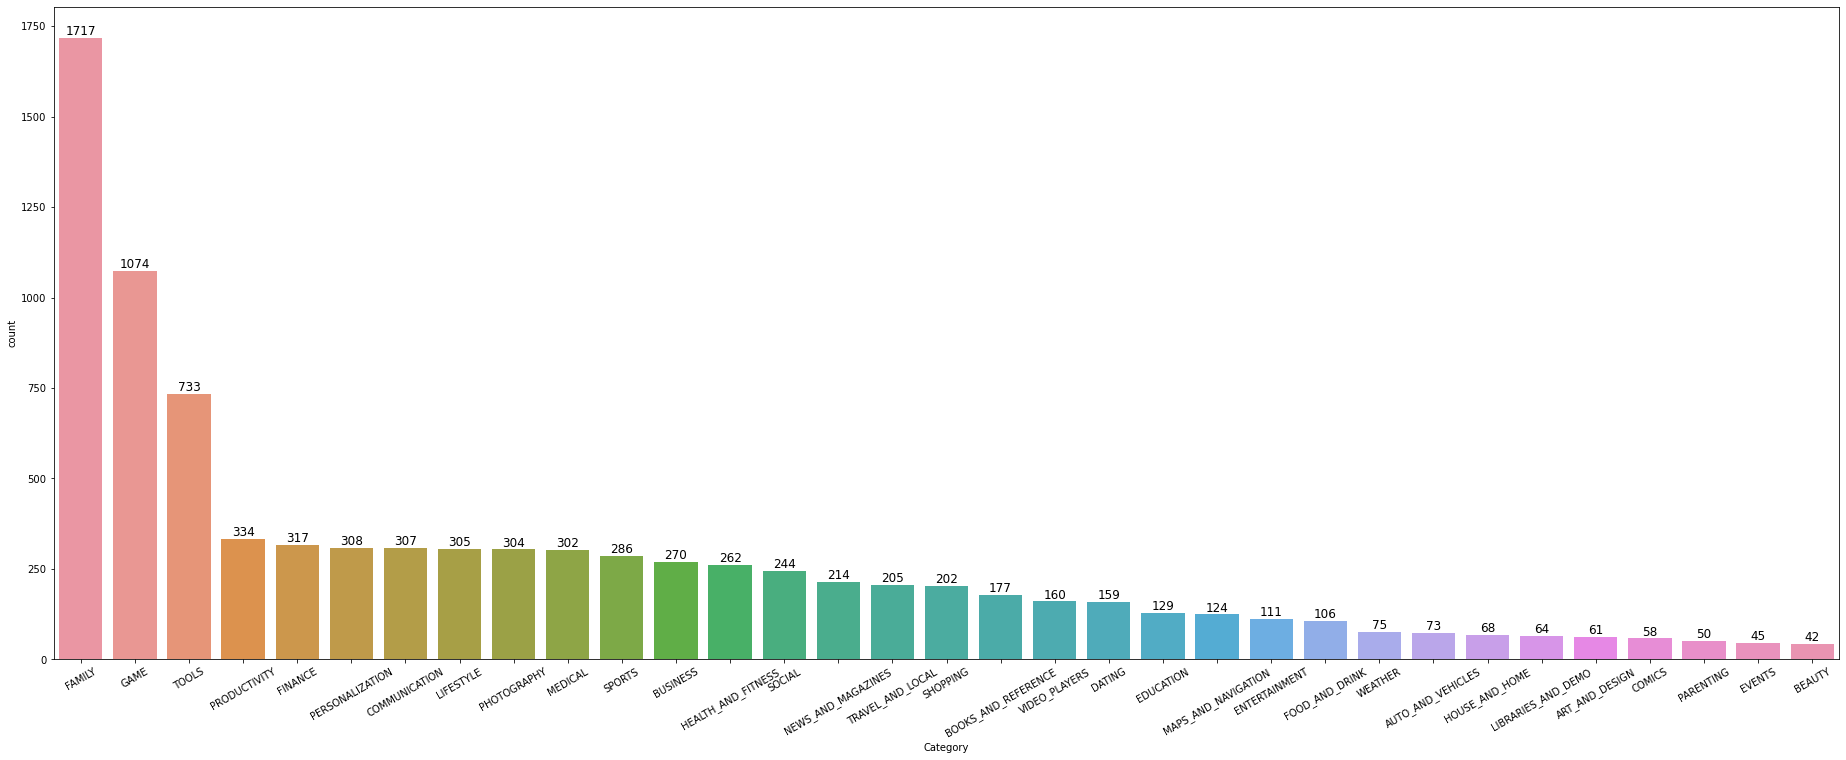

In [6]:
plt.figure(figsize=(32, 12))

# Bar chart app 
ax = sns.countplot(data=playstore, x='Category', order=playstore['Category'].value_counts().index)
plt.xticks(rotation=30)

# Aggiunta delle etichette dei dati
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)


plt.show()
plt.close()

# Step 1

As we have seen, Family is the main category found in our Dataframe. It is followed by Game (12%) and Tools (8%). If we wanted to design a new App, surely we should pay attention to the first categories at the top. If there are a large number of apps belonging to these categories, there must be a reason: let's figure out what it is.

Average number of installations and total rating can come to our aid to put it in better context. 

Category
COMMUNICATION          7.867180e+07
SOCIAL                 5.128624e+07
VIDEO_PLAYERS          3.888686e+07
PRODUCTIVITY           3.731458e+07
PHOTOGRAPHY            3.197777e+07
TRAVEL_AND_LOCAL       3.103346e+07
GAME                   2.937045e+07
NEWS_AND_MAGAZINES     2.520145e+07
ENTERTAINMENT          2.212306e+07
TOOLS                  1.562104e+07
SHOPPING               1.273927e+07
BOOKS_AND_REFERENCE    1.082651e+07
PERSONALIZATION        6.734876e+06
FAMILY                 5.848038e+06
MAPS_AND_NAVIGATION    5.840867e+06
WEATHER                5.681287e+06
SPORTS                 5.344516e+06
HEALTH_AND_FITNESS     5.194680e+06
EDUCATION              4.138388e+06
BUSINESS               3.198215e+06
FOOD_AND_DRINK         2.431866e+06
FINANCE                2.430008e+06
ART_AND_DESIGN         2.036526e+06
HOUSE_AND_HOME         1.839441e+06
LIFESTYLE              1.753250e+06
DATING                 1.298883e+06
COMICS                 9.661397e+05
LIBRARIES_AND_DEMO 

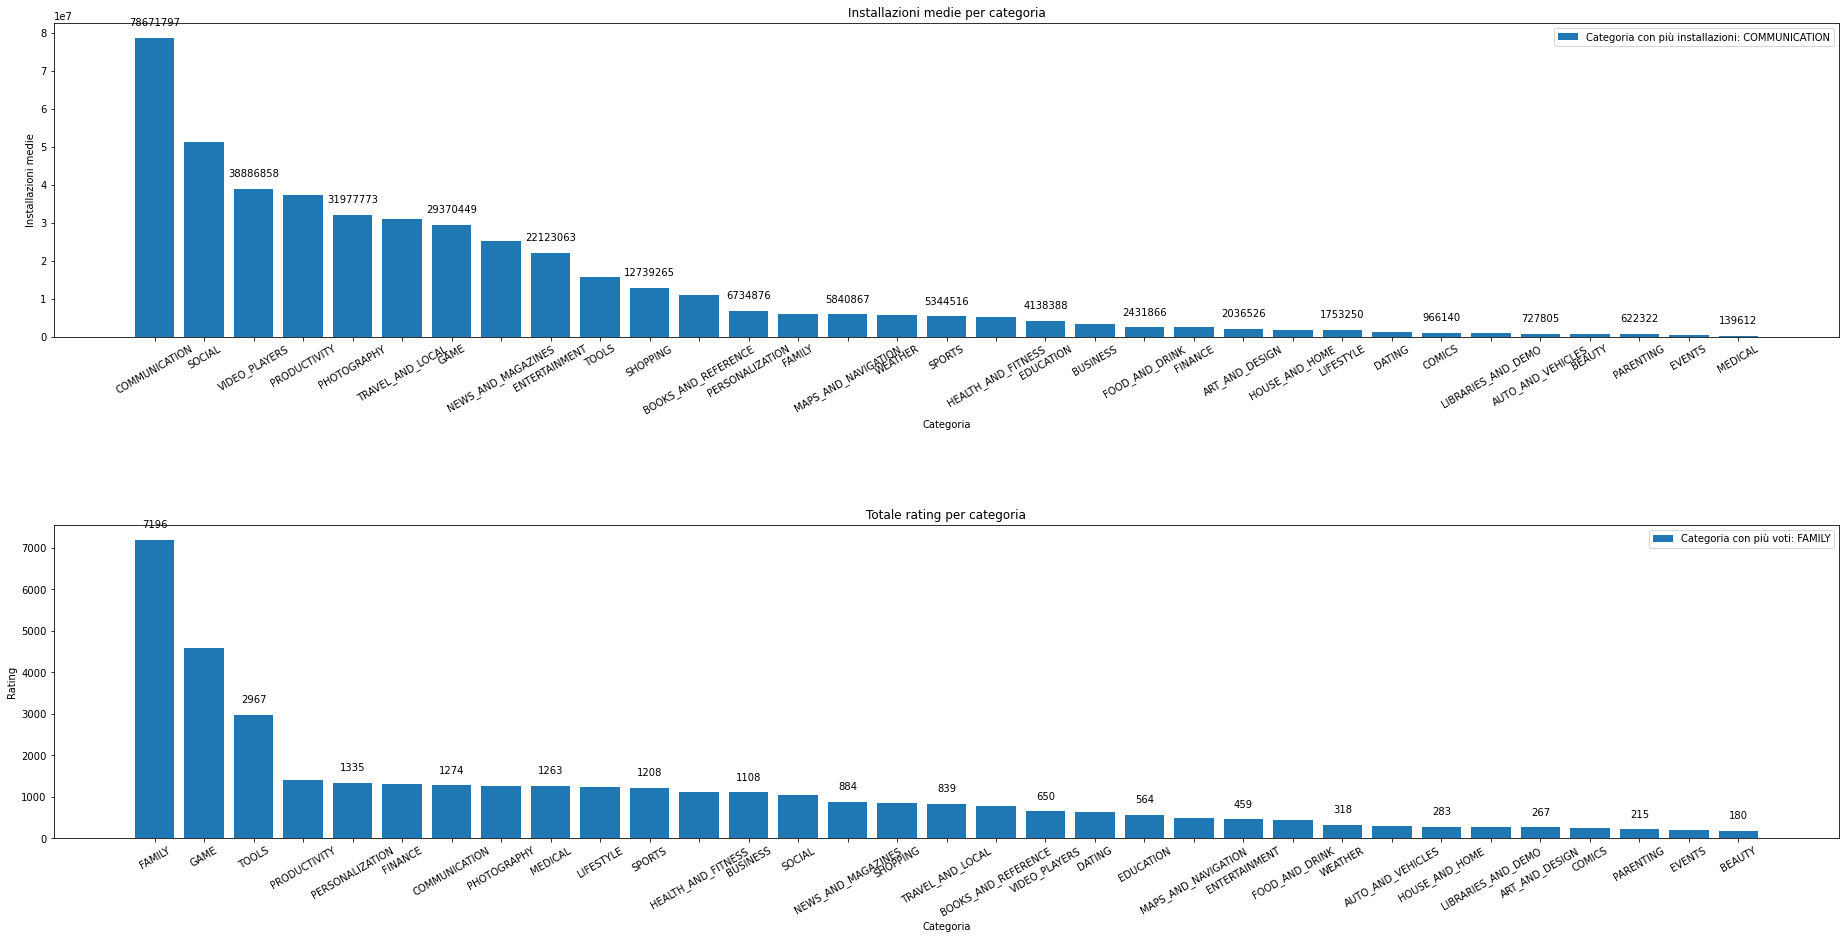

In [7]:
category_installations = playstore.groupby('Category').Installs.mean()
category_installations = category_installations.sort_values(ascending=False)
print(category_installations)

print(line)

category_rating = playstore.groupby('Category').Rating.sum()
category_rating = category_rating.sort_values(ascending=False)
print(category_rating)


plt.figure(figsize=(32, 15))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# Categoria con il massimo numero di installazioni e il massimo di rating
max_category = category_installations.idxmax()
max_rating = category_rating.idxmax()

# first graph
plt.subplot(2,1,1)
ax1 = plt.bar(category_installations.index, category_installations.values)
plt.xticks(rotation=30)
plt.title('Installazioni medie per categoria')
plt.xlabel('Categoria')
plt.ylabel('Installazioni medie')
plt.legend(['Categoria con più installazioni: {}'.format(max_category)])

# Aggiungi le etichette ai bar -> solo barre dispari per favorire la visibilità
for i in range(len(ax1)):
    if i % 2 != 1:
        plt.annotate("{:.0f}".format(category_installations.values[i]),
                     xy=(ax1[i].get_x() + ax1[i].get_width() / 2, ax1[i].get_height()),
                     xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')


# second graph
plt.subplot(2,1,2)
ax2 = plt.bar(category_rating.index, category_rating.values)
plt.xticks(rotation=30)
plt.title('Totale rating per categoria')
plt.xlabel('Categoria')
plt.ylabel('Rating')
plt.legend(['Categoria con più voti: {}'.format(max_rating)])

# Aggiungi le etichette ai bar -> solo barre dispari per favorire la visibilità
for i in range(len(ax2)):
    if i % 2 != 1:
        plt.annotate("{:.0f}".format(category_rating.values[i]),
                     xy=(ax2[i].get_x() + ax2[i].get_width() / 2, ax2[i].get_height()),
                     xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')

plt.show()
plt.close()

The communications category has more average installations. The figure is not surprising. In fact, it follows the Social category. Until proven otherwise, the main function of mobile is to communicate. We find apps like gmail, browser apps, skype, facetime, telegram. These are certainly apps that everyone has on their cell phone. If we wanted to develop a communication app, however, we would have to take into account competition from the major web giants. 

In [41]:
communication_apps = playstore[playstore.Category == 'COMMUNICATION']

# Calcola le installazioni medie per app
avg_installs = communication_apps.groupby('App').Installs.mean().reset_index()

# Visualizza il DataFrame con le app della categoria "COMMUNICATION" e le rispettive installazioni medie per app
avg_installs = avg_installs.sort_values('Installs', ascending=False)
avg_installs

,App,Installs
119,Google Chrome: Fast & Secure,1.000000e+09
196,Skype - free IM & video calls,1.000000e+09
125,Hangouts,1.000000e+09
231,WhatsApp Messenger,1.000000e+09
116,Gmail,1.000000e+09
...,...,...
33,BS-Mobile,5.000000e+01
72,Cb browser,5.000000e+01
93,EJ messenger,1.000000e+01
82,DK Browser,1.000000e+01


## Step 2



Each category has genres. We know that the top three categories-in terms of presence in the playstore-are Game, Family and tools. Let's find out what the main genres of these three categories are. We will need them to guide us in choosing our app. 

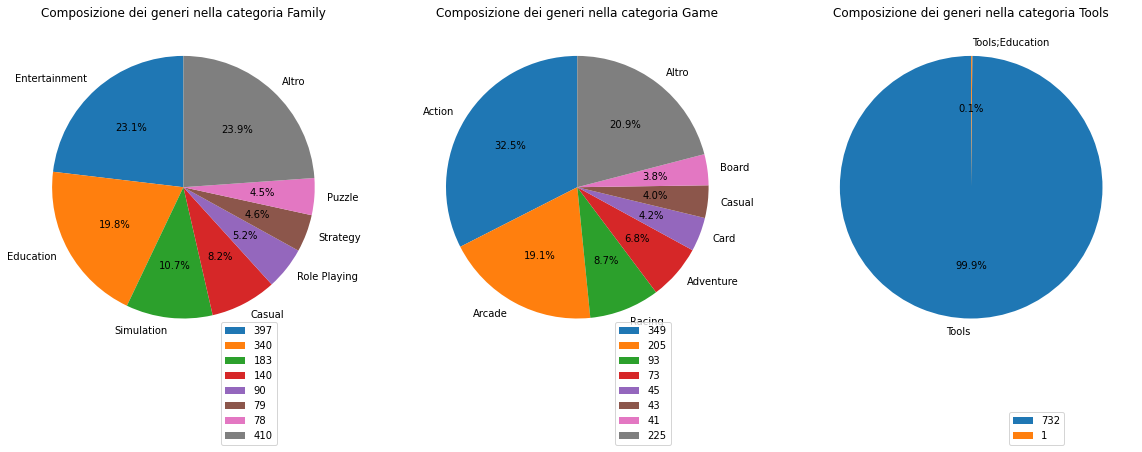

In [8]:
# Filtriamo per le prime categorie
top_three_categories = ['GAME', 'FAMILY', 'TOOLS']
top_three_genres = playstore[playstore['Category'].isin(top_three_categories)]
genres_category = top_three_genres.groupby('Category')['Genres'].value_counts()

# Personalizzazione grafici
plt.figure(figsize=(20, 12))

# Frist graph -> Categoria "Family"
family_genres = genres_category.loc['FAMILY']
# Prendiamo solo i primi sette generi e calcoliamo la somma del resto
top_genres_family = family_genres[:7]
other_genres_family = family_genres[7:].sum()
top_genres_family['Altro'] = other_genres_family
plt.subplot(1,3,1)
plt.pie(top_genres_family, labels=top_genres_family.index, autopct='%1.1f%%', startangle=90)
plt.legend(top_genres_family, loc='lower center', bbox_to_anchor=(0.7, -0.3))
plt.title('Composizione dei generi nella categoria Family')


# second graph -> Categoria 'Game'
game_genres = genres_category.loc['GAME']
# Prendiamo solo i primi sette generi e calcoliamo la somma del resto
top_genres_game = game_genres[:7]
other_genres_game = game_genres[7:].sum()
top_genres_game['Altro'] = other_genres_game
plt.subplot(1,3,2)
plt.pie(top_genres_game, labels=top_genres_game.index, autopct='%1.1f%%', startangle=90)
plt.legend(top_genres_game, loc='lower center', bbox_to_anchor=(0.7, -0.3))
plt.title('Composizione dei generi nella categoria Game')


# Thrird graph -> Categoria 'Tools'
tools_genres = genres_category.loc['TOOLS']
plt.subplot(1,3,3)
plt.pie(tools_genres, labels=tools_genres.index, autopct='%1.1f%%', startangle=90)
plt.legend(tools_genres, loc='lower center', bbox_to_anchor=(0.7, -0.3))
plt.title('Composizione dei generi nella categoria Tools')

plt.show()


Good. The Family category points a lot to Entertaiment. Educational content is also very popular. Action games are going strong for the Game category, interesting.  As for Tools--tools are tools. Nothing specific 

## Step 3

Game on average is the most downloaded category, but Family the one with the most votes. Targeting these two categories could be strategic. Let us proceed with our analysis by focusing on the Game and Family categories.

As we can see, the vast majority of the Apps are free. However, let us delve into the Price theme. 

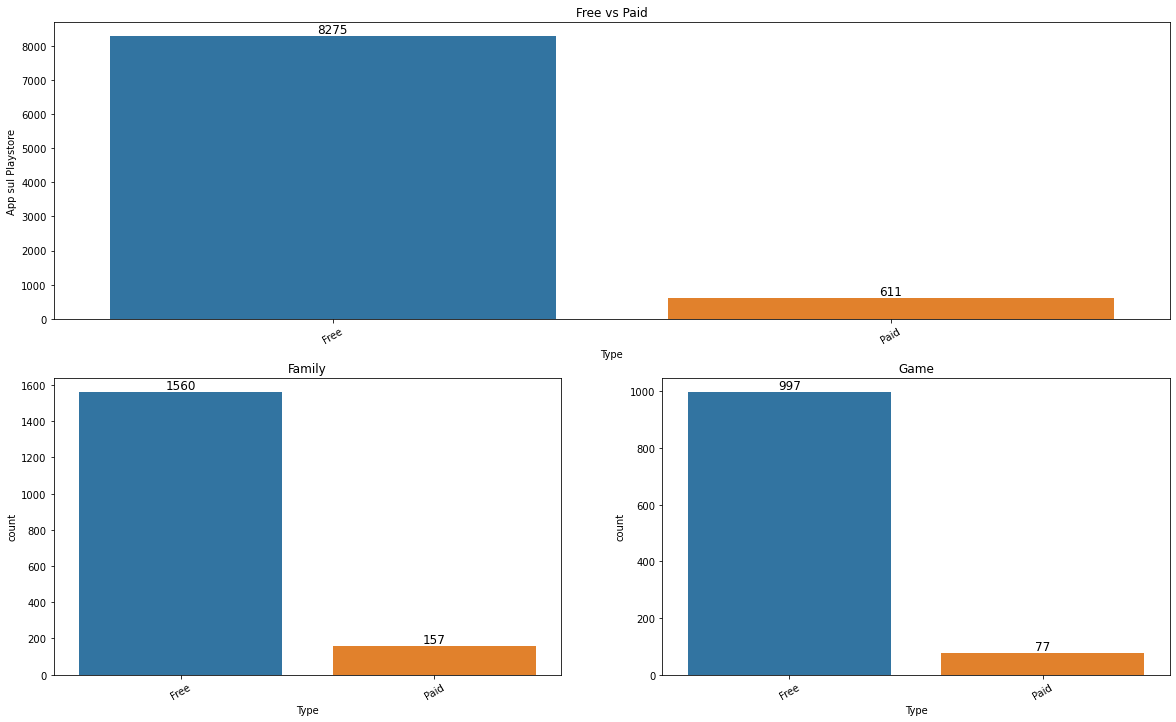

In [9]:
# Dati filtrati per categorie principali
family_data = playstore[playstore['Category'].str.contains('FAMILY', na=False, regex=False)]
game_data = playstore[playstore['Category'].str.contains('GAME', na=False, regex=False)]

# Personalizzazione grafici
plt.figure(figsize=(20, 12))


# first graph
plt.subplot(2,1,1)
ax = sns.countplot(data=playstore, x='Type', order=playstore['Type'].value_counts().index)
plt.xticks(rotation=30)
# etichette dati
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.ylabel('App sul Playstore')
plt.title('Free vs Paid')
    
# second graph
plt.subplot(2,2,3)
ax1 = sns.countplot(data=family_data, x='Type', order=playstore['Type'].value_counts().index)
plt.xticks(rotation=30)
# etichette dati
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title('Family')

# third graph
plt.subplot(2,2,4)
ax2 = sns.countplot(data=game_data, x='Type', order=playstore['Type'].value_counts().index)
plt.xticks(rotation=30)
# etichette dati
for p in ax2.patches:
    ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title('Game')


plt.show()

Sì, questi grafici ci confermano che si prediliggono le versioni free. Valutiamo meglio in termini percentuali le nostre due categorie in esame

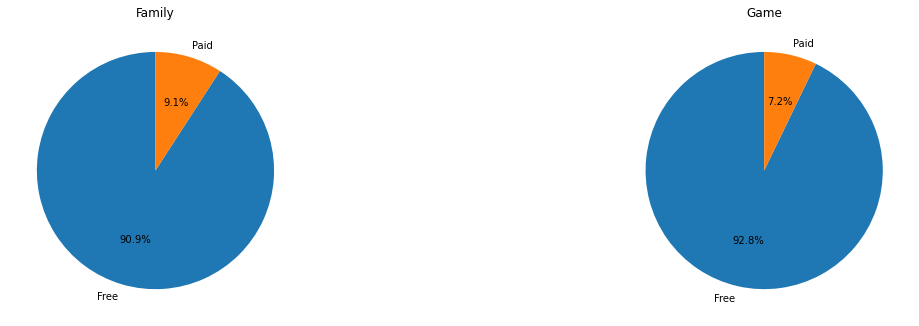

In [10]:
# Dati filtrati per categorie principali
family_data = playstore[playstore['Category'].str.contains('FAMILY', na=False, regex=False)]
game_data = playstore[playstore['Category'].str.contains('GAME', na=False, regex=False)]

# Personalizzazione grafici
plt.figure(figsize=(20, 12))

# first graph
plt.subplot(2,2,3)
ax1 = family_data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Family')

# second graph
plt.subplot(2,2,4)
ax2 = game_data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Game')

# Show the plot
plt.show()

## Step 4

Certainly we need to have an eye toward free versions. But let's figure out, if we ever want to offer a paid version, what prices we should go for. 

### Prices (in general)

We isolate the Price column from all values equal to 0, so we can evaluate only those apps that actually have a price.  

In [11]:
# filtrati dalla versione free. 
all_prices = playstore[playstore.Price != 0] 
all_prices = all_prices[all_prices.Price <= 80]

# Media
price_mean = all_prices.Price.mean()
print("il presso medio è: " + str(price_mean))
print(line)

# Mediana
price_median = all_prices.Price.median()
print("La mediana è: " + str(price_median))
print(line)

# Mode -> il valore più comune
price_mode = all_prices.Price.mode()
print("Mode è: " + str(price_mode))
print(line)

il presso medio è: 4.516828859060353
____________________
La mediana è: 2.99
____________________
Mode è: 0    2.99
Name: Price, dtype: float64
____________________


### Note:

We excluded from our analysis apps priced above 80 euros. This is because there are about 20 apps that are implausibly priced and target a very residual target. Unless we want to target the super-rich, we avoid considering these prices so that we have more reliable data within the reach of individual mortals.

Curious? let's see what these apps are:

In [12]:
expensive_apps = playstore[playstore.Price >= 80]

# Nuovo dataframe contenente solo il nome dell'app e il prezzo
expensive_apps_df = expensive_apps[['App', 'Price', 'Rating']].sort_values('Price', ascending=False).reset_index(drop=True)

expensive_apps_df

,App,Price,Rating
0,I'm Rich - Trump Edition,400.00,3.6
1,most expensive app (H),399.99,4.3
2,💎 I'm rich,399.99,3.8
3,I am rich,399.99,3.8
4,I am Rich Plus,399.99,4.0
5,I Am Rich Premium,399.99,4.1
6,I am Rich!,399.99,3.8
7,I am rich(premium),399.99,3.5
8,I Am Rich Pro,399.99,4.4
9,I am rich (Most expensive app),399.99,4.1


As we can see, the name of the apps says it all 🤣

### Prezzi per la categoria Family

In [13]:
# Analisi, per la categoria Family
family_prices = all_prices[all_prices.Category == 'FAMILY']

# Media
price_mean_family = family_prices.Price.mean()
print("il prezzo medio per la categoria Family è: " + str(price_mean_family))
print(line)

# Mediana
price_median_family = family_prices.Price.median()
print("La mediana dei prezzi per la categoria Family è: " + str(price_median_family))
print(line)

# Moda -> il valore più comune
price_mode_family = family_prices.Price.mode()
print("La moda dei prezzi per la categoria Family è: " + str(price_mode_family))
print(line)

il prezzo medio per la categoria Family è: 4.521764705882359
____________________
La mediana dei prezzi per la categoria Family è: 2.99
____________________
La moda dei prezzi per la categoria Family è: 0    2.99
Name: Price, dtype: float64
____________________


### Prezzi per la categoria Game

In [14]:
# Analisi, per la categoria Game
game_prices = all_prices[all_prices.Category == 'GAME']

# Media
price_mean_game = game_prices.Price.mean()
print("il prezzo medio per la categoria Game è: " + str(price_mean_game))
print(line)

# Mediana
price_median_game = game_prices.Price.median()
print("La mediana dei prezzi per la categoria Game è: " + str(price_median_game))
print(line)

# Moda -> il valore più comune
price_mode_game = game_prices.Price.mode()
print("La moda dei prezzi per la categoria Game è: " + str(price_mode_game))
print(line)

il prezzo medio per la categoria Game è: 3.641038961038964
____________________
La mediana dei prezzi per la categoria Game è: 2.99
____________________
La moda dei prezzi per la categoria Game è: 0    0.99
Name: Price, dtype: float64
____________________


### Price and Rating: is there correlation? 

The expectations of those who purchase an app may be higher than those who download a free version. You pay for quality, they say. But let us prepare our argument graphically. 

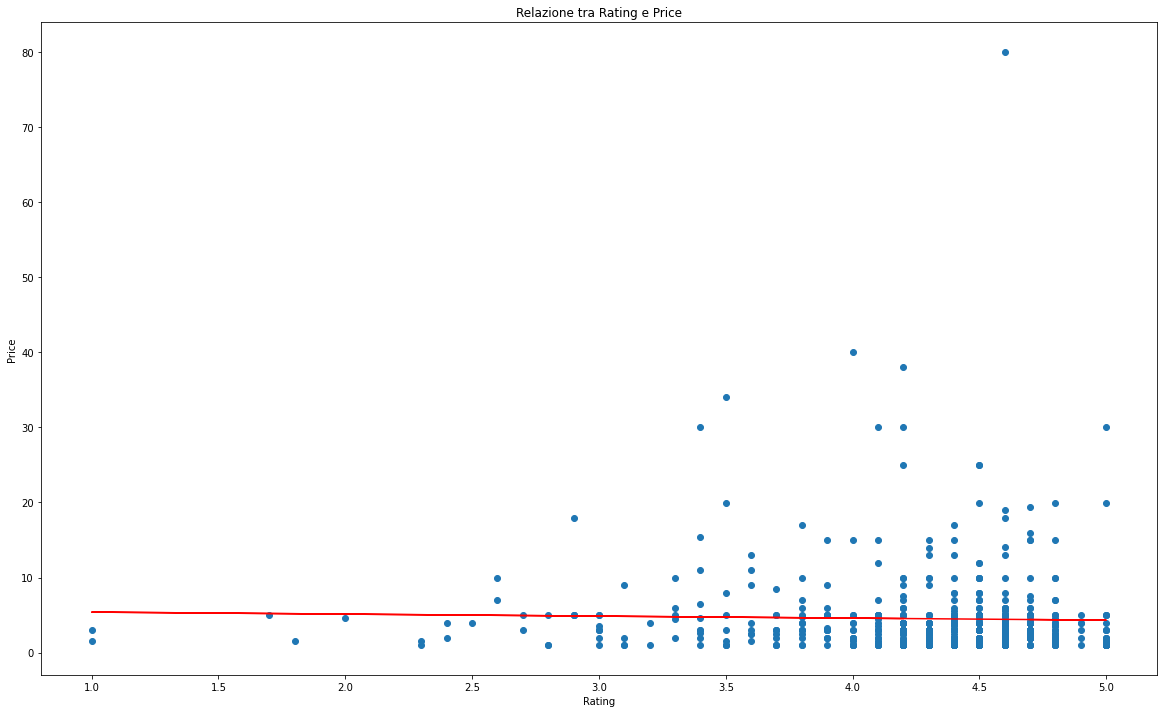

In [15]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))

plt.scatter(x = all_prices.Rating, y = all_prices.Price)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Relazione tra Rating e Price')


# Aggiungiamo la linea di tendenza
coefficients = np.polyfit(all_prices.Rating, all_prices.Price, 1)
line_function = np.poly1d(coefficients)
plt.plot(all_prices.Rating, line_function(all_prices.Rating), color='red')

# Mostra il grafico
plt.show()

Apps with a high price are not necessarily those with higher ratings.  

## Step 5

Let us examine the relationship between:

1. rating - reviews
2. rating - installs  

As we asserted above, we avoid considering rich people's apps. 

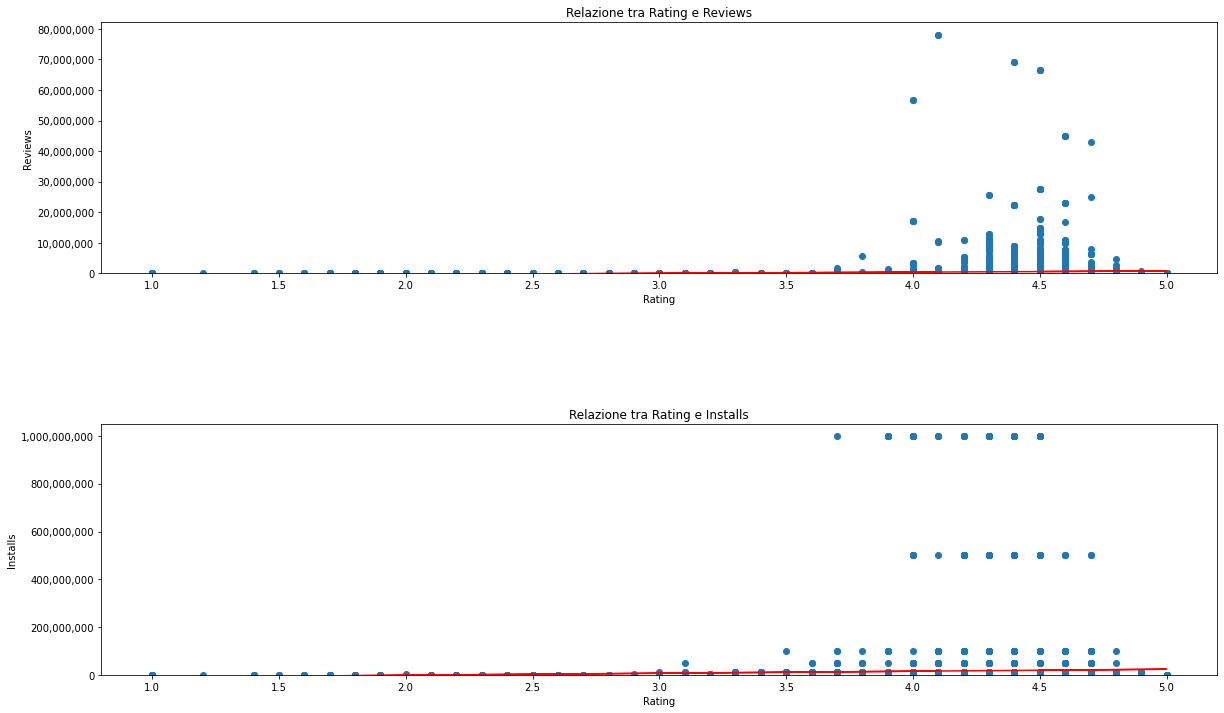

In [16]:
#Filtro ricconi
playstore_realistic_price = playstore[playstore.Price <= 80]

# Personalizzazione grafici
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# first graph
plt.subplot(2,1,1)
x1 = playstore_realistic_price.Rating
y1 = playstore_realistic_price.Reviews
coefficients1 = np.polyfit(x1, y1, 1)
line1 = np.poly1d(coefficients1)
plt.plot(x1, line1(x1), color='red')
plt.scatter(x1, y1)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Relazione tra Rating e Reviews')
plt.ylim(bottom=0) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ','))) 

# second graph
plt.subplot(2,1,2)
x2 = playstore_realistic_price.Rating
y2 = playstore_realistic_price.Installs
coefficients2 = np.polyfit(x2, y2, 1)
line2 = np.poly1d(coefficients2)
plt.plot(x2, line2(x2), color='red')
plt.scatter(x2, y2)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Relazione tra Rating e Installs')
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Mostra il grafico
plt.show()

On the other hand, the higher the rating, the more user installations and comments are recorded. This indicates to us how important it is to pay attention to the rating of our app. 

In [17]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


## Step 6

We evaluate apps more closely, especially their sentiment.

In [18]:
best_apps = user_reviews.groupby('App').Sentiment.value_counts().unstack(fill_value=0)

best_apps

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,5,11,79
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1,8,27
11st,7,9,23
1800 Contacts - Lens Store,3,5,32
1LINE – One Line with One Touch,8,3,27
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,12,5,22
Hotspot Shield Free VPN Proxy & Wi-Fi Security,3,14,15
Hotstar,14,4,14


We filter apps and analyze the top 20 apps by sentiment

In [19]:
sentiment_positive = best_apps[['Negative', 'Neutral', 'Positive']].sort_values(by='Positive', ascending=False).head(20)
sentiment_neutral = best_apps[['Negative', 'Neutral', 'Positive']].sort_values(by='Neutral', ascending=False).head(20)
sentiment_negative = best_apps[['Negative', 'Neutral', 'Positive']].sort_values(by='Negative', ascending=False).head(20)

In [20]:
sentiment_positive

Sentiment,Negative,Neutral,Positive
App,,,
ColorNote Notepad Notes,6,2,91
Calorie Counter - Macros,10,3,87
Family Locator - GPS Tracker,7,13,85
Calorie Counter - MyNetDiary,2,12,82
8fit Workouts & Meal Planner,11,7,82
Bible,7,9,80
10 Best Foods for You,5,11,79
Google Photos,24,1,76
Calorie Counter & Diet Tracker,14,8,75


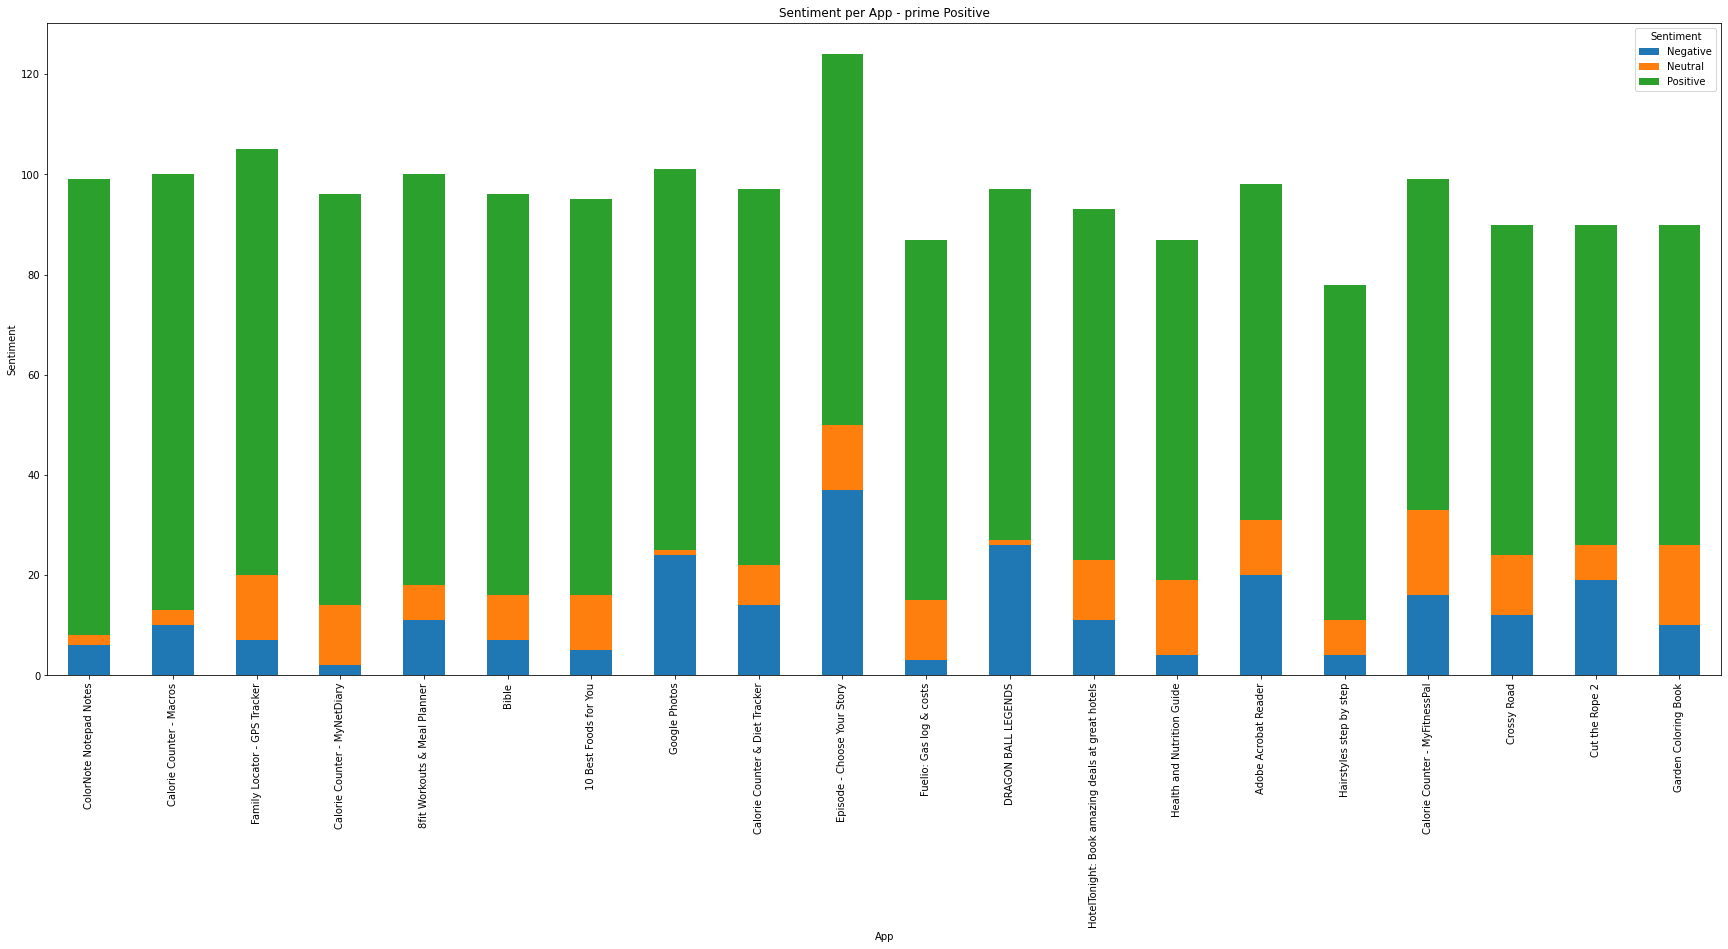

In [21]:
sentiment_positive.plot(kind='bar', stacked=True, figsize=(30,12))
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.title('Sentiment per App - prime Positive')
plt.xlabel('App')
plt.ylabel('Sentiment')


plt.show()

In [22]:
sentiment_neutral

Sentiment,Negative,Neutral,Positive
App,,,
"BestCam Selfie-selfie, beauty camera, photo editor",27,35,20
Azar,25,29,36
Easy Installer - Apps On SD,8,23,8
Fast Secure VPN,11,23,36
Color by Number - Draw Sandbox Pixel Art,17,20,55
Facebook,59,18,53
AdWords Express,2,18,15
Blood Pressure(BP) Diary,8,18,14
A+ Mobile,9,18,57


findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


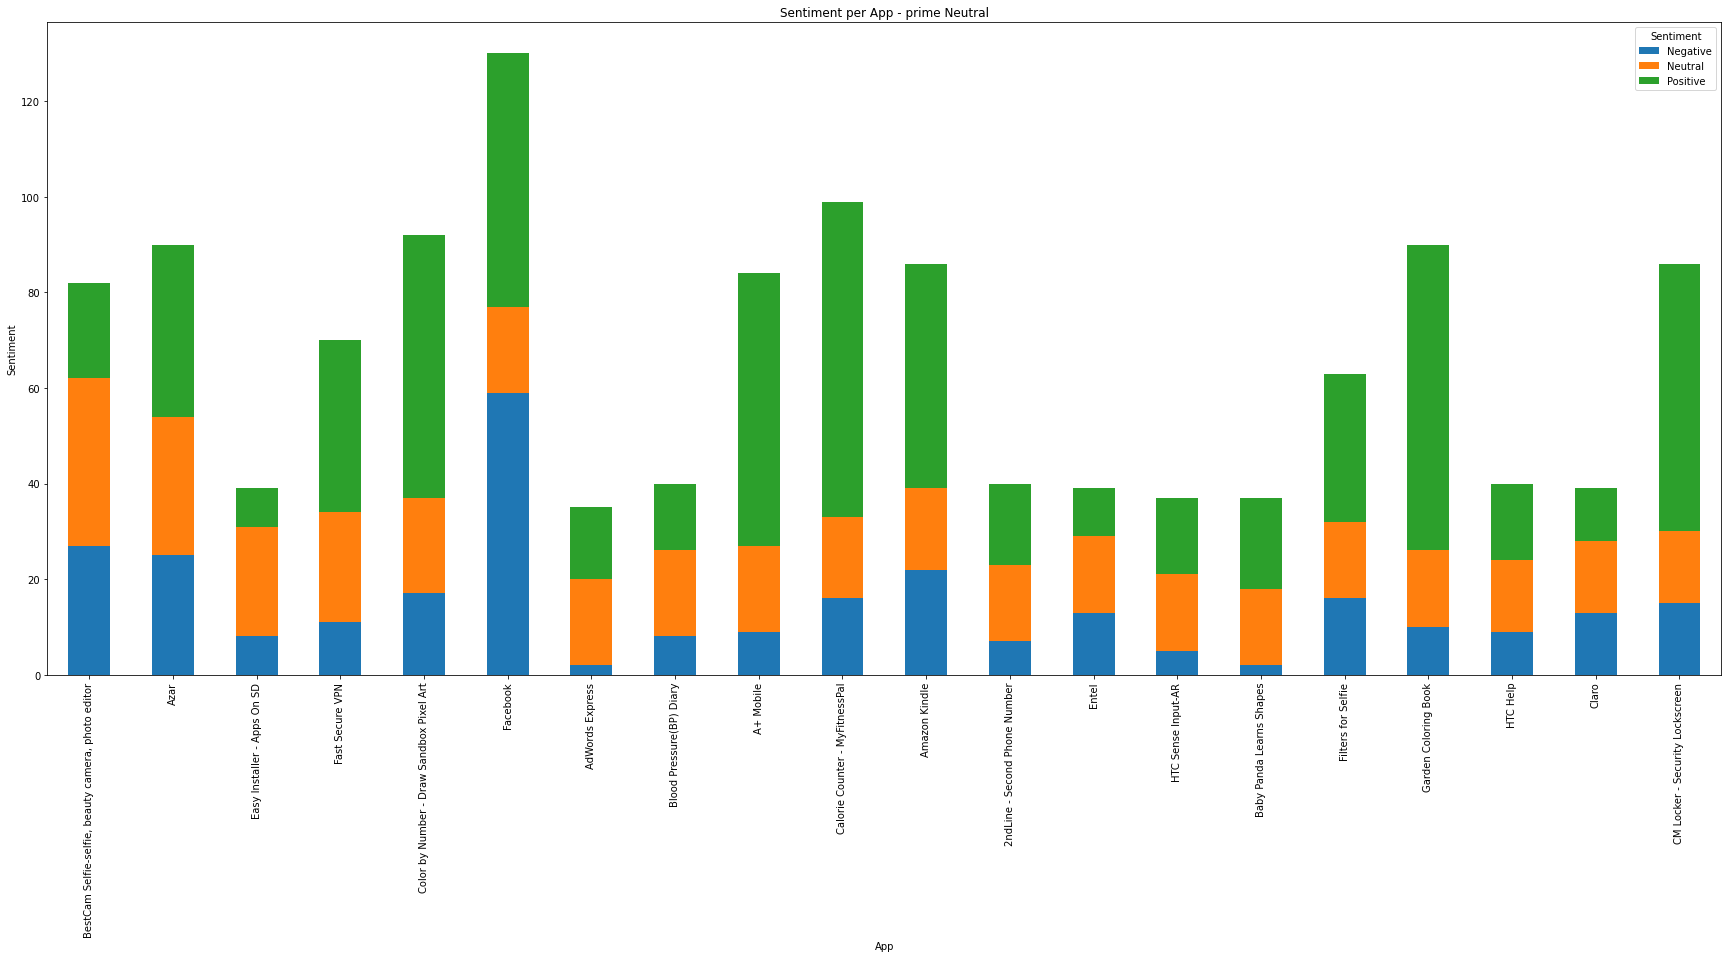

In [23]:
sentiment_neutral.plot(kind='bar', stacked=True, figsize=(30,12))
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.title('Sentiment per App - prime Neutral')
plt.xlabel('App')
plt.ylabel('Sentiment')

plt.show()

In [24]:
sentiment_negative

Sentiment,Negative,Neutral,Positive
App,,,
Angry Birds Classic,59,1,47
Be A Legend: Soccer,59,6,33
Facebook,59,18,53
Cooking Fever,57,1,38
Candy Crush Soda Saga,50,4,37
Gardenscapes,50,0,46
8 Ball Pool,46,2,48
Agar.io,44,8,42
Basketball Stars,41,4,44


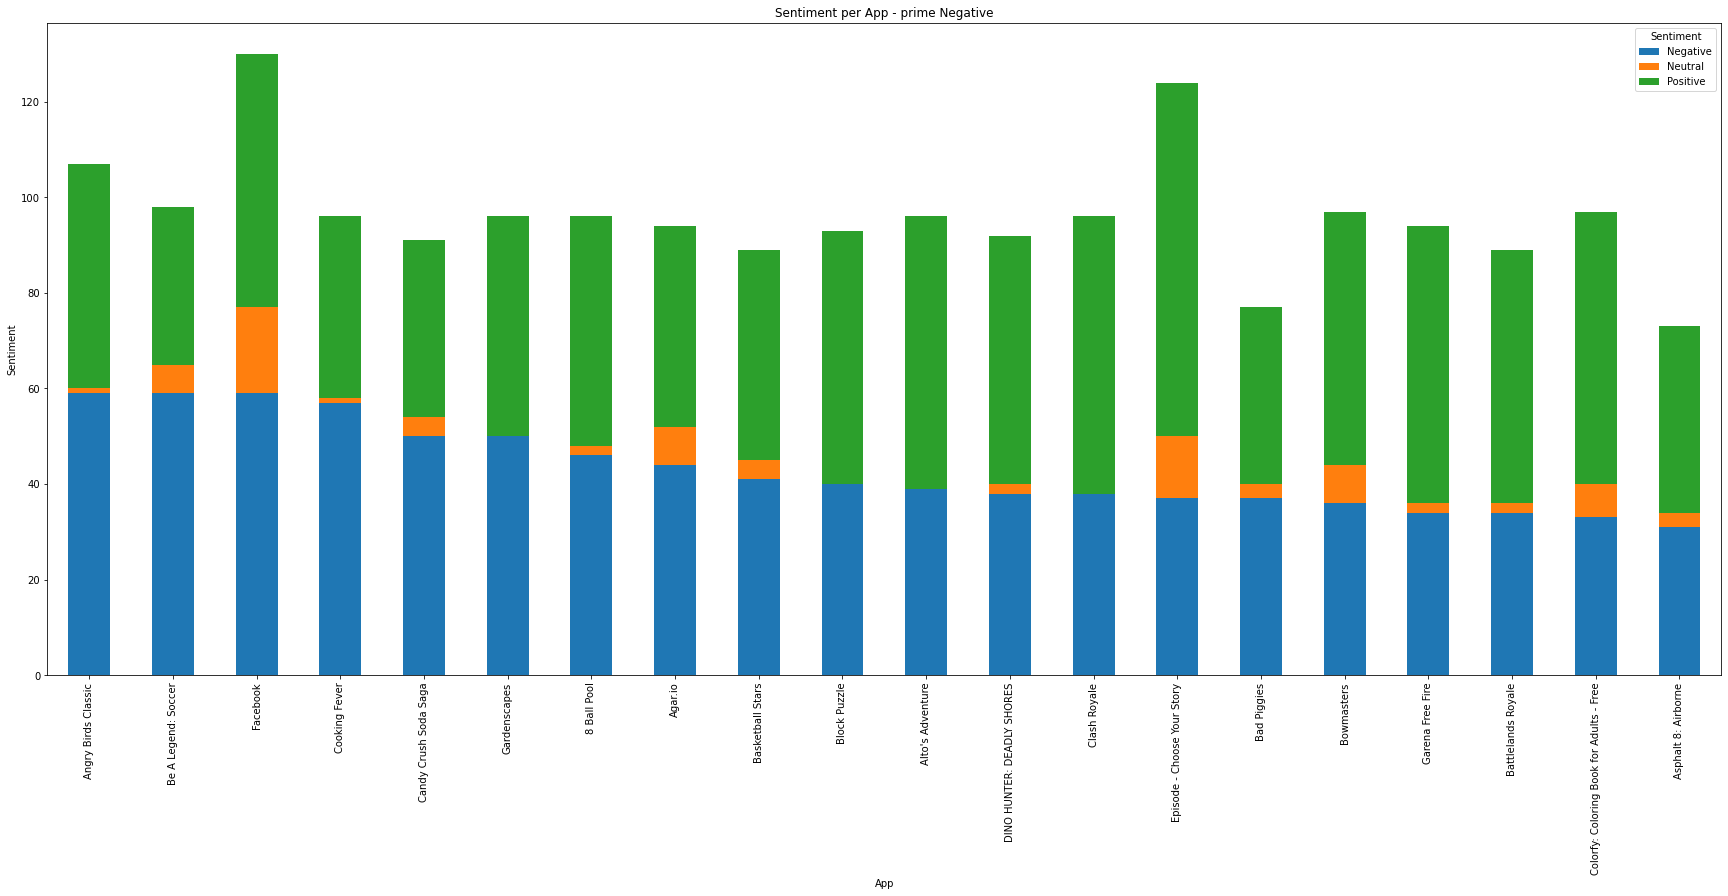

In [25]:
sentiment_negative.plot(kind='bar', stacked=True, figsize=(30,12))
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.title('Sentiment per App - prime Negative')
plt.xlabel('App')
plt.ylabel('Sentiment')

plt.show()

## Step 8

Let's take the categories again. Now that we know the corresponding sentiment for the top 20 positive apps, the top 20 neutral apps, and the top 20 negative apps we associate the category to which they belong. 

In [26]:
# Negative_df
top_20_negative_apps = ['Angry Birds Classic', 'Be A Legend: Soccer', 'Facebook', 'Cooking Fever', 'Candy Crush Soda Saga', 'Gardenscapes',
        '8 Ball Pool', 'Agar.io', 'Basketball Stars', 'Block Puzzle', 'Alto\'s Adventure', 'DINO HUNTER: DEADLY SHORES',
        'Clash Royale', 'Episode - Choose Your Story', 'Bad Piggies', 'Bowmasters', 'Garena Free Fire', 'Battlelands Royale',
        'Colorfy: Coloring Book for Adults - Free', 'Asphalt 8: Airborne']

top_20_negative_category = ['Game', 'Game', 'Social', 'Game', 'Game', 'Game', 'Game', 'Game', 'Sports', 'Game', 'Game', 'Game', 'Game', 'Game', 'Game', 'Game', 'Game', 'Game', 'Entertainment', 'Game']

top_negative = pd.DataFrame({'App': top_20_negative_apps, 'Category': top_20_negative_category})

# Neutral_df
top_20_neutral_apps = ['BestCam Selfie-selfie, beauty camera, photo editor', 'Azar', 'Easy Installer - Apps On SD', 'Fast Secure VPN', 'Color by Number - Draw Sandbox Pixel Art',
        'Facebook', 'AdWords Express', 'Blood Pressure(BP) Diary', 'A+ Mobile', 'Calorie Counter - MyFitnessPal', 'Amazon Kindle', '2ndLine - Second Phone Number', 'Entel', 
        'HTC Sense Input-AR', 'Baby Panda Learns Shapes', 'Filters for Selfie', 'Garden Coloring Book', 'HTC Help', 'Claro', 'CM Locker - Security Lockscreen']

top_20_neutral_category = ['Beauty', 'Communication', 'Business', 'Tools', 'Family', 'Social', 'Business', 'Medical', 'Finance', 'Health', 'Books', 'Communication', 'Lifestyle',
                           'Tools', 'Parenting', 'Beauty', 'Art', 'Books', 'Productivity', 'Tools']

top_neutral = pd.DataFrame({'App': top_20_neutral_apps, 'Category': top_20_neutral_category})


# Positive_df
top_20_positive_apps = ["ColorNote Notepad Notes", "Calorie Counter - Macros", "Family Locator - GPS Tracker", "Calorie Counter - MyNetDiary", "8fit Workouts & Meal Planner",
                        "Bible", "10 Best Foods for You", "Google Photos", "Calorie Counter & Diet Tracker", "Episode - Choose Your Story", "Fuelio: Gas log & costs", 
                        "DRAGON BALL LEGENDS", "HotelTonight: Book amazing deals at great hotels", "Health and Nutrition Guide", "Adobe Acrobat Reader", "Hairstyles step by step",
                        "Calorie Counter - MyFitnessPal", "Crossy Road", "Cut the Rope 2", "Garden Coloring Book"]

top_20_positive_category = ['Productivity', 'Health', 'Lifestyle', 'Health', 'Health', 'Books', 'Health', 'Photography', 'Health', 'Game', 'Auto', 'Game', 'Travel',
                            'Health', 'Productivity', 'Beauty', 'Health', 'Game', 'Game', 'Art']

top_positive = pd.DataFrame({'App': top_20_positive_apps, 'Category': top_20_positive_category})

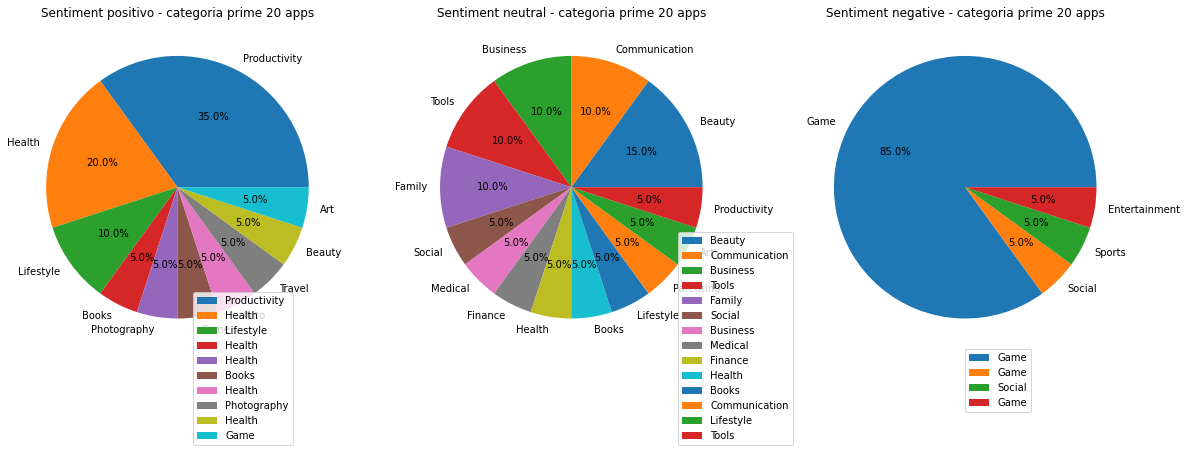

In [27]:
# Personalizzazione grafici
plt.figure(figsize=(20, 15))

# first graph
plt.subplot(1,3,1)
plt.pie(top_positive.Category.value_counts(), labels=top_positive.Category.unique(), autopct='%1.1f%%')
plt.legend(top_positive.Category, loc='lower center', bbox_to_anchor=(0.7, -0.3))
plt.title("Sentiment positivo - categoria prime 20 apps")

# second graph
plt.subplot(1,3,2)
plt.pie(top_neutral.Category.value_counts(), labels=top_neutral.Category.unique(), autopct='%1.1f%%')
plt.legend(top_neutral.Category, loc='lower center', bbox_to_anchor=(1.0, -0.3))
plt.title("Sentiment neutral - categoria prime 20 apps")

# third graph
plt.subplot(1,3,3)
plt.pie(top_negative.Category.value_counts(), labels=top_negative.Category.unique(), autopct='%1.1f%%')
plt.legend(top_negative.Category, loc='lower center', bbox_to_anchor=(0.6, -0.2))
plt.title("Sentiment negative - categoria prime 20 apps")

plt.show()

## Step 9

As we can see, the top 20 apps with negative sentiment are mainly from the Game category. As we have seen before, this is one of the most installed and present categories in the playstore. We could develop a game, but we have to take into account that we face negative reviews. Games such as Angry birds or Clash Royale, are in fact perceived both very positively and very negatively. 

The neutral pie chart depicts an almost heterogeneous split. Nothing specific.

The first graph, however, the Health and Productivity categors register an interesting insight. Productivity is the fourth category in the playstore, with a significant gap already with the third category; yet the main positively perceived apps belong to the Productivity category. One might think of developing something niche, useful for users.

Let's better apprehend the topic of sentiment. 

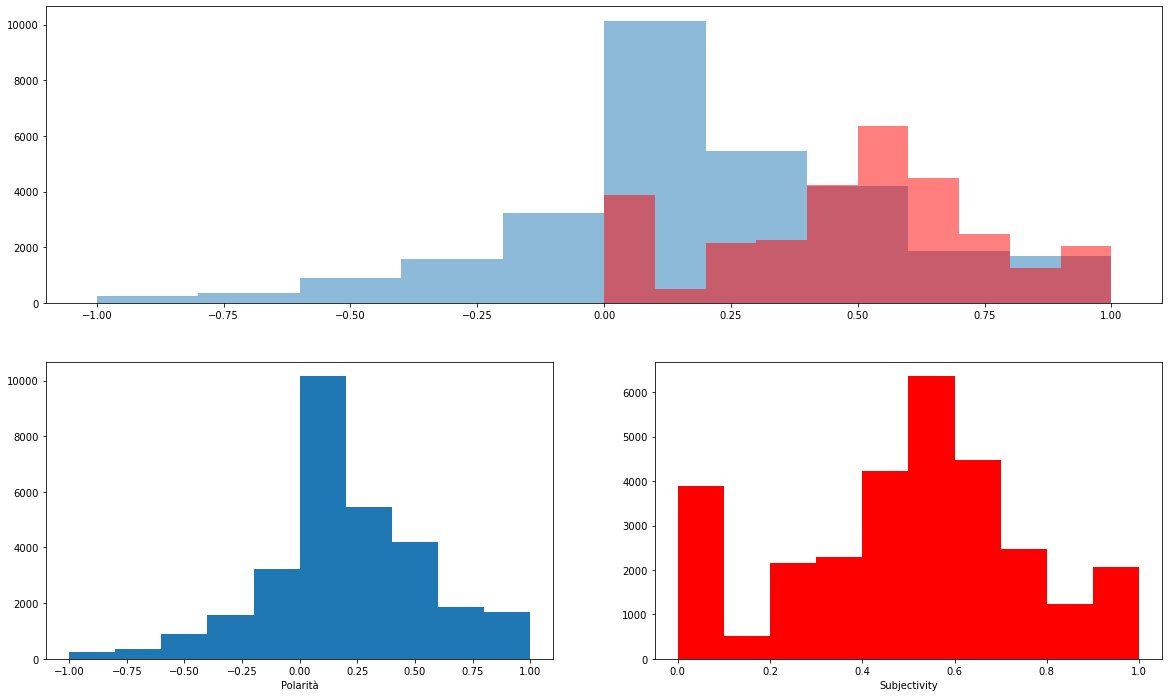

In [28]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))


# first graph
plt.subplot(2,1,1)
ax1 = plt.hist(user_reviews.Sentiment_Polarity, alpha=0.5)
ax2 = plt.hist(user_reviews.Sentiment_Subjectivity, color="red", alpha=0.5)

# Second graph 
plt.subplot(2,2,3)
ax1 = plt.hist(user_reviews.Sentiment_Polarity)
plt.xlabel('Polarità')

# third graph
plt.subplot(2,2,4)
ax2 = plt.hist(user_reviews.Sentiment_Subjectivity, color="red")
plt.xlabel('Subjectivity')

plt.show()

# Considerazioni Finali 

Sviluppare un'app che tenda verso le categorie Game o Family può essere la strada giusta. Più Family rispetto a Game. Una buona app Family può registrare un ottimo rating, oltre che un percezione positiva. Discorso diverso per Game: può avere tanti voti alti ma anche tanti voti bassi, e di conseguenza il sentiment potrebbe essere un tema difficile da gestire. Punterei sulla categoria Game se vi è la volanta di puntare su un gioco di azione (come abbiamo visto il genere più presente con il 32%) e un team dedicato alla gestione dei commenti e alla risoluzione dei bug.   

Se si vuole andare sul sicuro meglio un app per le famiglie, versione free. Il prezzo non incide particolarmente sul rating. Se si vuole sostenere le spese di sviluppo, valutare comunque un prezzo basso e una buona qualità del prodotto finale. Non c'è niente di più snervante che pagare per qualcosa di basso valore. Si potrebbe sviluppare qualcosa sul genere educativo. Ci sono tanti rami dell'educazione che possono essere ampliati senza dover sviluppare app di grosse pretese. Il focus sarebbe il tema che si intende approfondire (matematica, python, public speaking), e dal punto di vista tecnologico si dovrebbe riflettere soltanto in un modo per offrire il nostro sapere in modo accessibile e semplice. 

Se il budget a disposizione è alto, si potrebbe valutare senz'altro di sviluppare un'app che riveda il modo di fare comunicazione. Se dovessimo avere successo, la nostra potrebbe essere potenzialmente su molti cellulari. 

Piccola nota per le app dei ricchi. E' vero, si rivolge a una nicchia molto ben specifica e molto residuale. Tuttavia queste tipologie di app si fanno pagare bene. Sviluppare un app per ricchi non sarebbe l'impegno principale (come abbimao visto il rating è sulla media), ma avviare una strategia di comunicazione che punti sull'esclusività. Non sarebbe la prima volta vedere genete ricca che compra cose di poco valore, solo per corroborare la loro idea di unicità rispetto gli altri. 